# Halley Fractals

Here we give an attempt at producing a fracting using a relative of the Newton-Raphson method, namely Halley's method which colours points in the complex plane according to how rapidly the following converges to various zeros of a given polynomial. In Halley's method, given an approximate zero $l$ we can replace this with a slightly better approximation
$$x_{n+1} = x_n - \frac{2f(x_n)f'(x_n)}{2f'(x_n) ^2 - f(x_n)f''(x_n)}.$$



## The usual imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## A couple of preliminaries

In [3]:
# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

## The main functions needed

In [4]:
def halley(z0, f, fprime, fprime2, MAX_IT=1000):
    """The Hally method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = 2*f(z)*fprime(z)/(2*fprime(z)**2 - f(z)*fprime2(z))
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

## The polynomial $z^2 - 1$

In the below we plot the Hally fractal correspondin to the polynomial $z^4-1$.

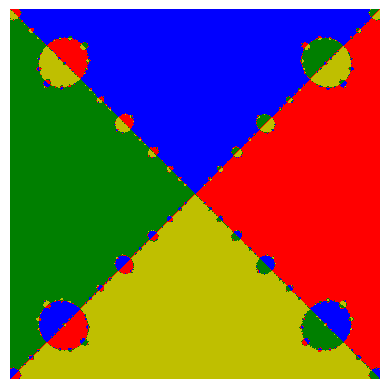

In [5]:
def plot_hally_fractal(f, fprime, fprime2, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Hally Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))
    
    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1
        
    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = halley(z0, f, fprime, fprime2)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3
fprime2 = lambda z: 12*z**2

plot_hally_fractal(f, fprime, fprime2, n=500)

## A slightly different zoom-in

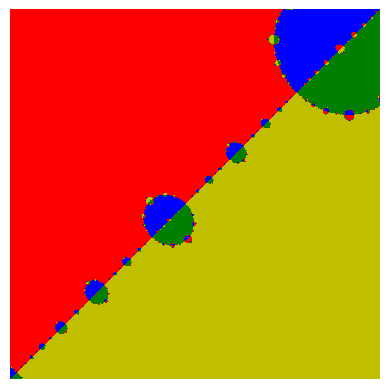

In [6]:
def plot_hally_fractal(f, fprime, fprime2, n=200, domain=(0.8, 1, 0.8, 1)):

    roots = []
    m = np.zeros((n, n))
    
    def get_root_index(roots, r):
        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1
        
    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = halley(z0, f, fprime, fprime2)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3
fprime2 = lambda z: 12*z**2

plot_hally_fractal(f, fprime, fprime2, n=500)

## Polynomial with a repeated root

For comparison we plot the fractal of a polynomial that has a repeated root, specifically $$

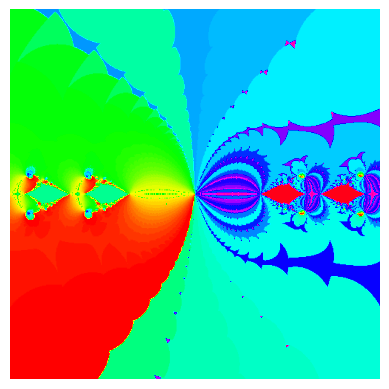

In [11]:
def plot_hally_fractal(f, fprime, fprime2, n=200, domain=(-2, 2, -2, 2)):

    roots = []
    m = np.zeros((n, n))
    
    def get_root_index(roots, r):
        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1
        
    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = halley(z0, f, fprime, fprime2)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**2 - z**4
fprime = lambda z: 2*z - 4*z**3
fprime2 = lambda z: 2 - 12*2**2

plot_hally_fractal(f, fprime, fprime2, n=500)